In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import VoterModelFunctions as vmf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialize network parameters

### possible inputs are: 
- **nodes**: number of nodes in the watts strogatz graph
- **k_nearest**: number of neighbors a node is connected to
- **p_reconnection**: probability to replace neighbor connection with random connection
- **p_groups**: probability a node gets the independent cue
- **r_L**: reliability of the independent cue
- **r_H**: reliability of the correlated cue
- **cue_positions**: distribution of cues across network: 'random', 'block', 'equal', 'choose_m' (only if vote distribution is 'random'
- **vote_distribution**:
    - 'Kao': distribute votes according to Kao model
    - 'random': votes are drawn from a Bernoulli distribution with p= p_groups
- **max_steps**: maximum number of interactions between neighbors
- **update_strategy**:
    - 'all-sync': each node takes the average over all neighbors votes, 
        changes its vote to 1 to if the average is positive, to -1 if 
        the average is negative and stays the same if the average is 0. 
        Update is synchronous for all nodes.
    - 'all-async': Same as above but asynchronous updates 
    - 'single': A randomly chosen node changes its opinion to that of a 
      randomly chosen neighbor (classic voter model).

In [17]:
params = vmf.init_voterModel_params(r_L=0.7, r_H=0.55, update_strategy='all_async')
vmf.print_params(params)

PARAMS:

----------------------------------------
nodes                10       
k_nearest            4        
p_reconnection       0.2      
p_groups             0.5      
r_L                  0.7      
r_H                  0.55     
cue_positions        random   
vote_distribution    Kao      
max_steps            1000     
update_strategy      all_async 
m                    None     
----------------------------------------


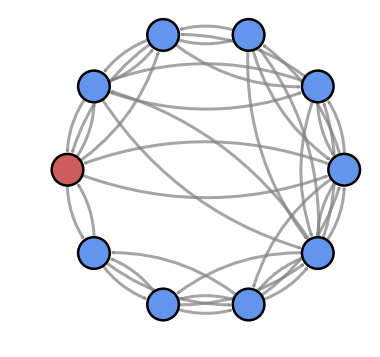

In [18]:
G = vmf.create_network(params, )

## Run a single round of updates

In [19]:
mean_vote, steps, individual_votes = vmf.update_votes_all_async(G, params, record=True)
print("Simulation ran for {} steps, the final average vote was: {}".format(steps, mean_vote))

Simulation ran for 6 steps, the final average vote was: 1.0


## Scan across several values of a parameter

In [38]:
vmf.scan(params, ['nodes'], [np.arange(5, 50, 5)], iters=1000, filename='example_data.csv')

Starting ForkPoolWorker-27
Starting ForkPoolWorker-25
Starting ForkPoolWorker-26
Starting ForkPoolWorker-28
Waiting for 1 tasks to complete...saved data to: 
 example_data.csv


In [39]:
df = pd.read_csv('example_data.csv')

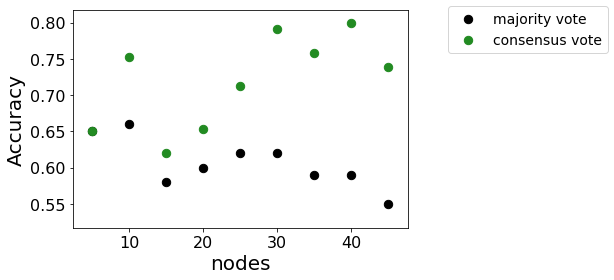

In [37]:
scan_var ='nodes'
plt.scatter(df[scan_var], df['accuracy_initial'], label='majority vote', s=70, color='k')
plt.scatter(df[scan_var], df['accuracy_consensus'], label='consensus vote', s=70, color='forestgreen')

plt.xlabel(scan_var, size=20)
plt.ylabel('Accuracy', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.legend(fontsize=14, bbox_to_anchor=(1.1, 1.05))
plt.show()